# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),  
  送入繪圖前的除了排序外, 還要注意什麼? (In[5])
- 如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [4]:
dir_data = './data/'
data = os.path.join(dir_data,'application_train.csv')
df = pd.read_csv(data)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df.DAYS_BIRTH = abs(df.DAYS_BIRTH)

# day-age to year-age
age_data['YEARS_BIRTH']= age_data['DAYS_BIRTH'] /365
age_data.head()

,DAYS_BIRTH,TARGET,YEARS_BIRTH,YEARS_BIRTH
0,9461,1,25.920548,25.920548
1,16765,0,45.931507,45.931507
2,19046,0,52.180822,52.180822
3,19005,0,52.068493,52.068493
4,19932,0,54.608219,54.608219


In [37]:
#自 20 到 70 歲，切 11 個點 (得到 10 組)
"""
Your Code Here
"""
bin_cut = np.linspace(20,70,11)   
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 

# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


,DAYS_BIRTH,TARGET,YEARS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,9461,1,25.920548,25.920548,"(25.0, 30.0]"
1,16765,0,45.931507,45.931507,"(45.0, 50.0]"
2,19046,0,52.180822,52.180822,"(50.0, 55.0]"
3,19005,0,52.068493,52.068493,"(50.0, 55.0]"
4,19932,0,54.608219,54.608219,"(50.0, 55.0]"


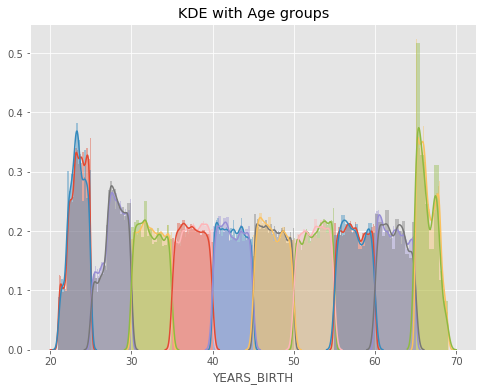

In [42]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted = age_data.sort_values(["YEARS_BINNED"])['YEARS_BINNED'].unique()

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [43]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,DAYS_BIRTH,TARGET,YEARS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,,
"(20.0, 25.0]",8532.795625,0.123036,23.377522,23.377522
"(25.0, 30.0]",10155.219250,0.111436,27.822518,27.822518
"(30.0, 35.0]",11854.848377,0.102814,32.479037,32.479037
"(35.0, 40.0]",13707.908253,0.089414,37.555913,37.555913
"(40.0, 45.0]",15497.661233,0.078491,42.459346,42.459346
"(45.0, 50.0]",17323.900441,0.074171,47.462741,47.462741
"(50.0, 55.0]",19196.494791,0.066968,52.593136,52.593136
"(55.0, 60.0]",20984.262742,0.055314,57.491131,57.491131
"(60.0, 65.0]",22780.547460,0.052737,62.412459,62.412459


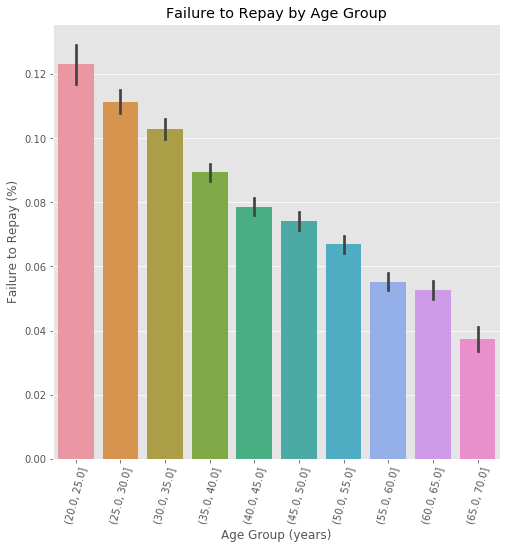

In [44]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_data.YEARS_BINNED
py = age_data.TARGET
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');